In [23]:
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
people=pd.read_csv('C:/Users/Administrator/Desktop/Assignment2_PGD B7/People _Charm _case.csv')
people.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
people.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [4]:
Y=people['left']
Y

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
14969    0
14970    1
14971    1
14972    0
14973    0
14974    1
14975    0
14976    0
14977    0
14978    0
14979    1
14980    0
14981    0
14982    0
14983    0
14984    0
14985    0
14986    1
14987    1
14988    1
14989    0
14990    0
14991    0
14992    0
14993    0
14994    1
14995    0
14996    0
14997    0
14998    0
Name: left, Length: 14999, dtype: int64

In [5]:
people.drop(['left'],axis=1,inplace=True)

In [6]:
num_p=people[['satisfactoryLevel','lastEvaluation','numberOfProjects','avgMonthlyHours','timeSpent.company','workAccident','promotionInLast5years']]
num_p.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.37,0.52,2,159,3,0,0
4,0.41,0.50,2,153,3,0,0


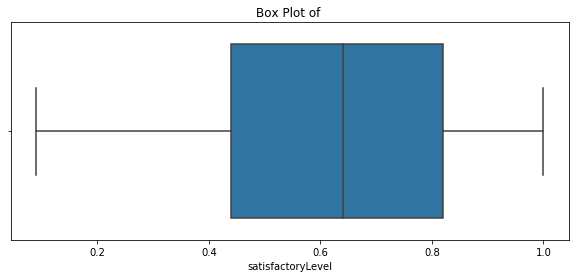

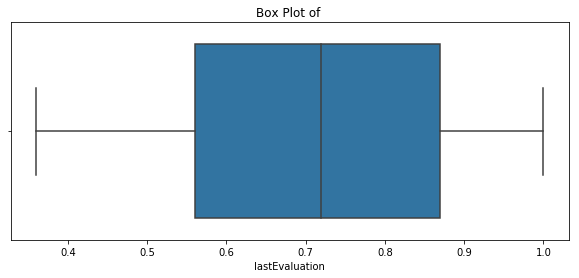

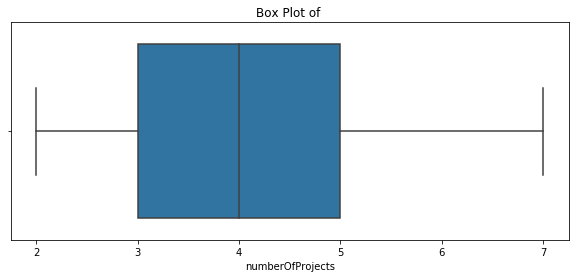

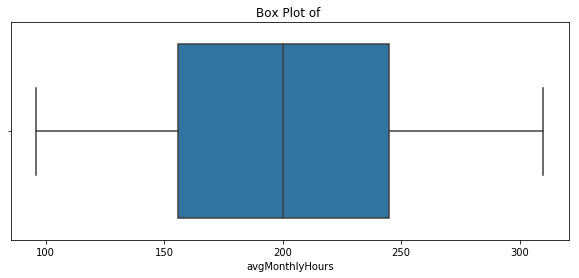

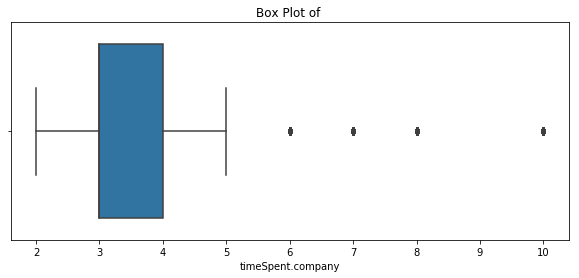

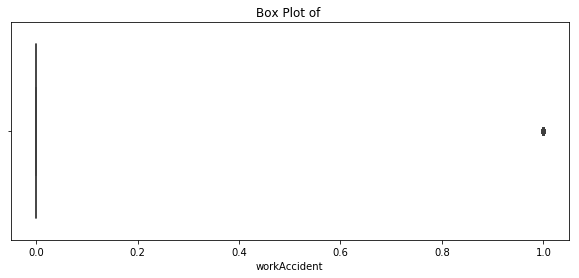

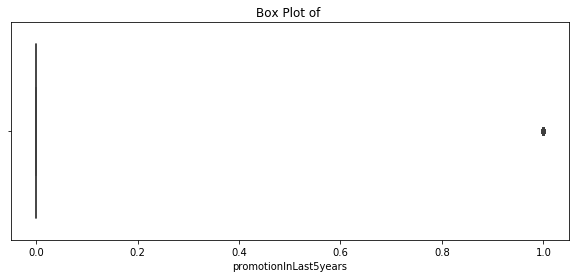

In [7]:
bp =PdfPages('x.pdf')

for num_variable in num_p:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x=num_variable,data =num_p)
    plt.title(str('Box Plot of '))
    bp.savefig(fig)
bp.close()

In [8]:
def outlier_capping(x):
    ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(ul)
    x = x.clip_lower(ll)
    return x

people_new_num=num_p.apply(lambda x: outlier_capping(x))
people_new_num.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  """


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.0,14999.0
mean,0.612834,0.716102,3.803054,201.050337,3.364291,0.0,0.0
std,0.248631,0.171169,1.232592,49.943099,1.086811,0.0,0.0
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.0,0.0
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.0,0.0
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.0,0.0
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.0,0.0
max,1.000000,1.000000,7.000000,310.000000,5.500000,0.0,0.0


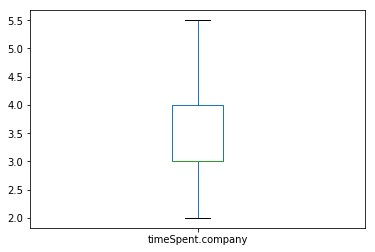

In [9]:
people_new_num['timeSpent.company'].plot(kind='box')


In [33]:
p_catL=people[['dept','salary']]
p_catL.head()
type(p_catL)

pandas.core.frame.DataFrame

In [11]:
p_catN=people[['dept','salary']]

In [12]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()
p_catL['dept']=x1.fit_transform(p_catL['dept'])
p_catL['salary']=x1.fit_transform(p_catL['salary'])
p_catL.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,dept,salary
0,7,1
1,7,2
2,7,2
3,7,1
4,7,1


In [13]:
x=pd.get_dummies(p_catN,prefix=['dept','salary'])
x.head()
type(x)

pandas.core.frame.DataFrame

In [14]:
people_new_num.skew()

satisfactoryLevel       -0.476360
lastEvaluation          -0.026622
numberOfProjects         0.337706
avgMonthlyHours          0.052842
timeSpent.company        0.573647
workAccident             0.000000
promotionInLast5years    0.000000
dtype: float64

In [15]:
num_p.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.37,0.52,2,159,3,0,0
4,0.41,0.50,2,153,3,0,0


In [16]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms_data=mms.fit_transform(people_new_num)
mms_data=pd.DataFrame(mms_data)
mms_data.columns=people_new_num.columns
mms_data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years
0,0.318681,0.265625,0.0,0.285047,0.285714,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,1.000000,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.571429,0.0,0.0
3,0.307692,0.250000,0.0,0.294393,0.285714,0.0,0.0
4,0.351648,0.218750,0.0,0.266355,0.285714,0.0,0.0


In [17]:
type(mms_data)

pandas.core.frame.DataFrame

In [18]:
master_data=pd.concat([mms_data,p_catL],axis=1)
master_data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept,salary
0,0.318681,0.265625,0.0,0.285047,0.285714,0.0,0.0,7,1
1,0.780220,0.781250,0.6,0.775701,1.000000,0.0,0.0,7,2
2,0.021978,0.812500,1.0,0.822430,0.571429,0.0,0.0,7,2
3,0.307692,0.250000,0.0,0.294393,0.285714,0.0,0.0,7,1
4,0.351648,0.218750,0.0,0.266355,0.285714,0.0,0.0,7,1


In [19]:
master_data2=pd.concat([mms_data,x],axis=1)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as knn

In [24]:
x_train,x_test,y_train,y_test=train_test_split(master_data,Y,test_size=0.2,random_state=0)
print(len(x_train),len(x_test))

11999 3000


In [35]:
Knn=knn(n_neighbors=3)
model=Knn.fit(x_train,y_train)
print('KNN Score=',Knn.score(x_test,y_test)*100)
prediction=model.predict(x_test)

KNN Score= 95.96666666666667


In [28]:
from sklearn.metrics import accuracy_score
print('accuracy=',accuracy_score(y_test,prediction))

accuracy= 0.9596666666666667


In [26]:
cm=confusion_matrix(y_test,prediction)
print('Confusion matrix is:',cm,sep='\n')

Confusion matrix is:
[[2170   81]
 [  40  709]]


In [29]:
k_list=[i for i in range(1,30)]

In [34]:
mis_class=[]
for k in k_list:
    Knn=knn(n_neighbors=k)
    model=Knn.fit(x_train,y_train)
    prediction=model.predict(x_test)
    mis_class.append(sum(prediction!=y_test))

Text(0, 0.5, 'Mean Error')

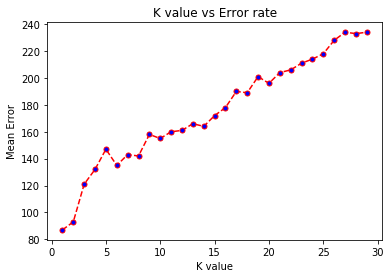

In [31]:
plt.plot(k_list,mis_class,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=5)
plt.title('K value vs Error rate')
plt.xlabel('K value')
plt.ylabel('Mean Error')

## K=3 is the optimum value from the graph that we obsvered

In [37]:
probs=model.predict_proba(x_test)
probs

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333]])

In [38]:
prob_positive=probs[:,1]
prob_positive

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.33333333])

In [39]:
from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.9765678983202244


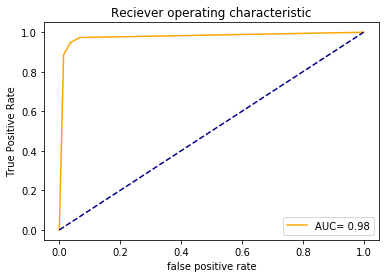

In [40]:
import matplotlib.pyplot as plt
plt.title('Reciever operating characteristic')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('false positive rate')
plt.show()

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
l_prediction=lr.predict(x_test)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [126]:
testing=lr.predict(x_train)
testing

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [125]:
print('accuracy=',accuracy_score(y_train,testing))

accuracy= 0.7596466372197683


In [44]:
score=lr.score(x_test,y_test)
score

0.753

In [45]:
print('accuracy=',accuracy_score(y_test,l_prediction))

accuracy= 0.753


In [46]:
cm=confusion_matrix(y_test,l_prediction)
print('Confusion matrix is:',cm,sep='\n')

Confusion matrix is:
[[2071  180]
 [ 561  188]]


In [47]:
probs1=lr.predict_proba(x_test)
probs1

array([[0.93954821, 0.06045179],
       [0.97131943, 0.02868057],
       [0.45289025, 0.54710975],
       ...,
       [0.82503866, 0.17496134],
       [0.74040336, 0.25959664],
       [0.93382195, 0.06617805]])

In [50]:
from sklearn import metrics
prob_positive1=probs1[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive1)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.8232472261252823


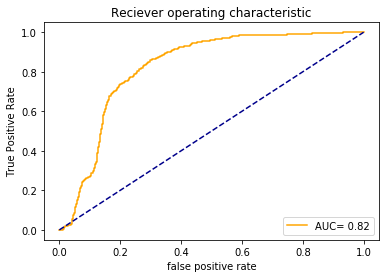

In [51]:
import matplotlib.pyplot as plt
plt.title('Reciever operating characteristic')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('false positive rate')
plt.show()

## Naïve Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [94]:
gn=GaussianNB()
gn.fit(x_train,y_train)
prediction_n=gn.predict(x_test)

In [95]:
print('accuracy=',accuracy_score(y_test,prediction_n))

accuracy= 0.7613333333333333


In [96]:
CM=confusion_matrix(y_test,prediction_n)
print('Confusion matrix is:',CM,sep='\n')

Confusion matrix is:
[[2052  199]
 [ 517  232]]


In [100]:
probs_n=gn.predict_proba(x_test)
probs_n

array([[0.96216816, 0.03783184],
       [0.98564438, 0.01435562],
       [0.38979724, 0.61020276],
       ...,
       [0.8552588 , 0.1447412 ],
       [0.93374268, 0.06625732],
       [0.95189392, 0.04810608]])

In [101]:
prob_positive_n=probs_n[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive_n)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.8745699137425348


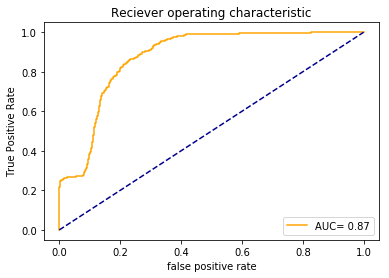

In [102]:
import matplotlib.pyplot as plt
plt.title('Reciever operating characteristic')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('false positive rate')
plt.show()

## Decision Tree

In [54]:
from sklearn.tree  import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)
prediction3=clf.predict(x_test)


In [56]:
cols2=master_data.columns

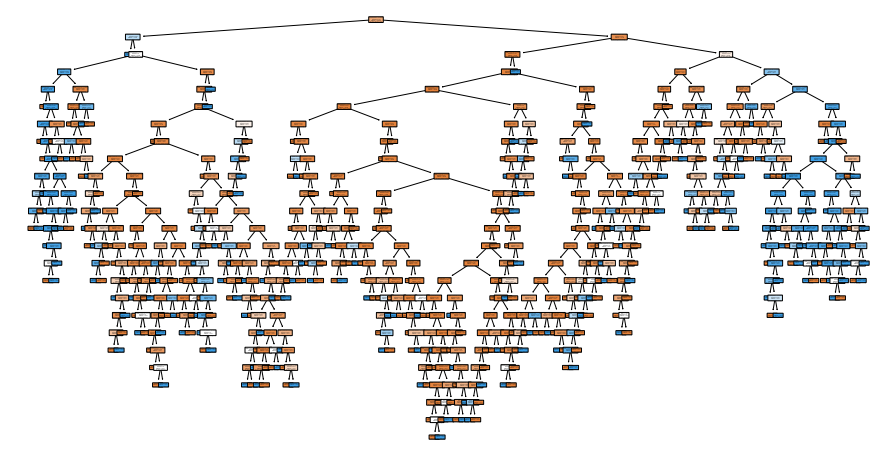

In [57]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
tree.plot_tree(clf.fit(master_data,Y),feature_names=cols2,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

In [58]:
print('Naive score=',clf.score(x_test,y_test)*100)

Naive score= 100.0


In [59]:
print('accuracy=',accuracy_score(y_test,prediction3))

accuracy= 0.9826666666666667


In [60]:
CM=confusion_matrix(y_test,prediction3)
print('Confusion matrix is:',CM,sep='\n')

Confusion matrix is:
[[2220   31]
 [  21  728]]


In [61]:
probs2=clf.predict_proba(x_test)
probs2

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [62]:
prob_positive2=probs2[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive2)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 1.0


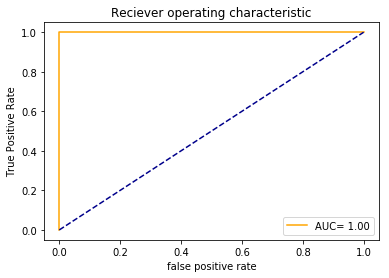

In [63]:
import matplotlib.pyplot as plt
plt.title('Reciever operating characteristic')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('false positive rate')
plt.show()

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [68]:
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)
prediction4=rf.predict(x_test)
accuracy_score(y_test,prediction4)

0.993

In [104]:
training=rf.predict(x_train)

In [105]:
print(accuracy_score(y_train,training))

1.0


In [69]:
CM=confusion_matrix(y_test,prediction4)
print('Confusion matrix is:',CM,sep='\n')

Confusion matrix is:
[[2249    2]
 [  19  730]]


In [70]:
probs3=rf.predict_proba(x_test)
probs3

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03]])

In [71]:
prob_positive3=probs3[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive3)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.9953460826489221


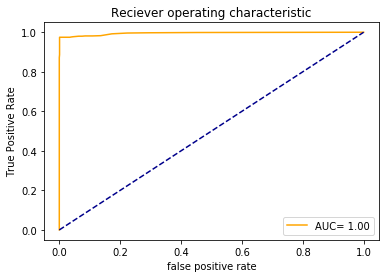

In [72]:
import matplotlib.pyplot as plt
plt.title('Reciever operating characteristic')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('false positive rate')
plt.show()

## Adaboost

In [75]:
ab=AdaBoostClassifier(n_estimators=100)
ab.fit(x_train,y_train)
prediction5=ab.predict(x_test)
accuracy_score(y_test,prediction5)

0.9543333333333334

In [76]:
CM=confusion_matrix(y_test,prediction5)
print('Confusion matrix is:',CM,sep='\n')

Confusion matrix is:
[[2190   61]
 [  76  673]]


In [79]:
probs4=ab.predict_proba(x_test)
probs4

array([[0.5980808 , 0.4019192 ],
       [0.60327227, 0.39672773],
       [0.59333039, 0.40666961],
       ...,
       [0.50296233, 0.49703767],
       [0.51871551, 0.48128449],
       [0.5155184 , 0.4844816 ]])

In [80]:
prob_positive4=probs4[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive4)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.9800506999114471


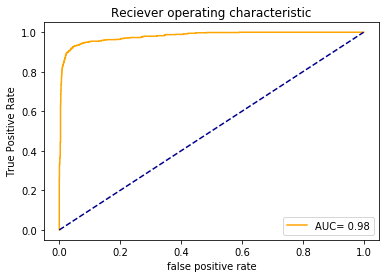

In [81]:
import matplotlib.pyplot as plt
plt.title('Reciever operating characteristic')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('false positive rate')
plt.show()

## Gradient Boosting

In [82]:
gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
prediction6=gb.predict(x_test)
accuracy_score(y_test,prediction6)

0.9763333333333334

In [83]:
CM=confusion_matrix(y_test,prediction6)
print('Confusion matrix is:',CM,sep='\n')

Confusion matrix is:
[[2231   20]
 [  51  698]]


In [84]:
probs5=gb.predict_proba(x_test)
probs5

array([[0.99491239, 0.00508761],
       [0.99652959, 0.00347041],
       [0.99689854, 0.00310146],
       ...,
       [0.96054204, 0.03945796],
       [0.9880039 , 0.0119961 ],
       [0.98427658, 0.01572342]])

In [85]:
prob_positive5=probs5[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive5)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.9885332079081897


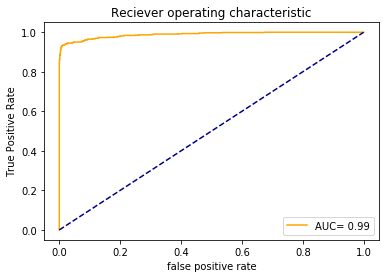

In [86]:
import matplotlib.pyplot as plt
plt.title('Reciever operating characteristic')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('false positive rate')
plt.show()

## XG Boost

In [88]:
from xgboost import XGBClassifier

In [89]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
prediction7=xgb.predict(x_test)
accuracy_score(y_test,prediction7)

0.977

In [90]:
probs6=xgb.predict_proba(x_test)
probs6

array([[0.9969558 , 0.00304416],
       [0.9983591 , 0.00164091],
       [0.99784863, 0.0021514 ],
       ...,
       [0.9336256 , 0.06637444],
       [0.98819846, 0.01180155],
       [0.98790145, 0.01209854]], dtype=float32)

In [92]:
prob_positive6=probs6[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive6)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.9879688540740534


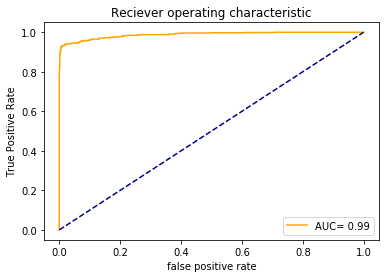

In [93]:
import matplotlib.pyplot as plt
plt.title('Reciever operating characteristic')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('false positive rate')
plt.show()

## The best accuracy is given by random forest which is 99.3% which tells us that in splitting 100 random subsets the model has learned well from those subsets also for overfitting  concern,the accuracy on training data set is 100% and it decreses to 99.3% when applied on testing data set so it shows model is performing well on testing data set so i will choose this as my predictor.


## In the output varible the ratio  of 1 & 0 is in approx 1:3 respectively  and i have divided the data in 80:20 ratio so there is a chance that all testing data would take only '0' so our model will be biased so in this accuracy fails so we have to take help of other factors such  as specificity to get the evalution.